In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Read the content of Bfield.rtf
with open('Data/Bfield.rtf', 'r') as file:
    lines = file.readlines()

# Process each line
updated_lines = []
for line in lines:
    parts = line.split()
    if len(parts) >= 3:
        parts[2] = str(float(parts[2]) + 50)
    updated_lines.append(' '.join(parts) + '\n')

# Write the updated content back to Bfield.rtf
with open('Bfield.rtf', 'w') as file:
    file.writelines(updated_lines)

In [10]:
from Classes.magnetic_field import MagneticField, QuadraticField, LHCb_Field

In [14]:
# Example usage
Bf = LHCb_Field('Data/Bfield.rtf')  # Assuming the file is a .rtf file
interpolated_Bfield = Bf.interpolated_field(0.0, 0.0, -25.0)
print(interpolated_Bfield)

[5000 5000 5000]


ValueError: One of the requested xi is out of bounds in dimension 0

In [15]:
Bf.interpolator_bx.grid

(array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350., 360., 370., 380., 390., 400.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350., 360., 370., 380., 390., 400.]),
 array([ -50.,  -40.,  -30.,  -20.,  -10.,    0.,   10.,   20.,   30.,
          40.,   50.,   60.,   70.,   80.,   90.,  100.,  110.,  120.,
         130.,  140.,  150.,  160.,  170.,  180.,  190.,  200.,  210.,
         220.,  230.,  240.,  250.,  260.,  270.,  280.,  290.,  300.,
         310.,  320.,  330.,  340.,  350.,  360.,  370.,  380.,  390.,
         400.,  410.,  420.,  430.,  440.,  450.,  460.,  470.,  480.,
         490.,

In [12]:
Bf = LHCb_Field('Data/Bfield.rtf')

In [ ]:
Bf.Bfield.shape

(41, 41, 146, 3)

In [ ]:
np.sqrt((-311679.96432358)**2  + (515188.72815395)**2  + (796491.23616963)**2)/1e6

np.float64(0.9984799021876494)

In [ ]:
for b in Bf.Bfield[:,:,:,:]:
    print(b.shape)

(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)
(41, 146, 3)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_field_slices(Bfield):
    """
    Plot the magnetic field slices for each z-coordinate with field strength represented by color
    and field direction represented by arrows.

    :param Bfield: 4D numpy array where the first three dimensions are x, y, z and the fourth dimension
                   is the magnetic field vector (Bx, By, Bz).
    """
    # Extract the size of the grid
    nx, ny, nz, _ = Bfield.shape

    # Create a meshgrid for x and y coordinates (assuming uniform spacing)
    x = np.arange(nx)
    y = np.arange(ny)
    X, Y = np.meshgrid(x, y)

    for z in range(nz):
        # Extract Bx, By, Bz for the current z-slice
        Bx = Bfield[:, :, z, 0]
        By = Bfield[:, :, z, 1]
        Bz = Bfield[:, :, z, 2]

        # Calculate the magnitude of the field at each point in the xy-plane
        B_magnitude = np.sqrt(Bx**2 + By**2 + Bz**2)

        # Create a figure and axis for plotting
        plt.figure(figsize=(8, 6))

        # Plot the magnitude of the field as a color map
        plt.contourf(X, Y, B_magnitude, cmap='plasma', levels=50)
        plt.colorbar(label='Field Strength |B|')

        # Plot the direction of the field using quiver (arrows)
        plt.quiver(X, Y, Bx, By, scale=50, color='white')

        # Add labels and title
        plt.title(f"Magnetic Field at z = {z}")
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)

        # Show the plot
        plt.show()

# plot_field_slices(B)



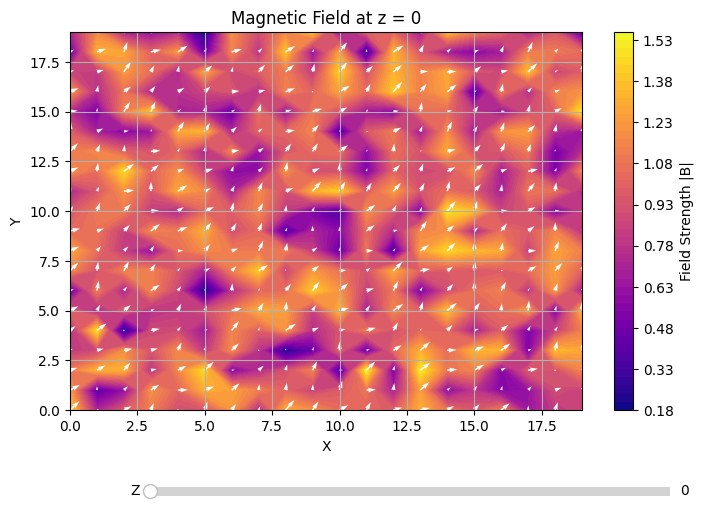

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

def plot_field_slice(Bfield, z):
    """
    Plot a magnetic field slice for a given z-coordinate with field strength as color
    and field direction as arrows.

    :param Bfield: 4D numpy array where the first three dimensions are x, y, z and the fourth dimension
                   is the magnetic field vector (Bx, By, Bz).
    :param z: z-coordinate for which the field slice should be plotted.
    """
    # Extract the size of the grid
    nx, ny, nz, _ = Bfield.shape

    # Create a meshgrid for x and y coordinates (assuming uniform spacing)
    x = np.arange(nx)
    y = np.arange(ny)
    X, Y = np.meshgrid(x, y)

    # Extract Bx, By, Bz for the current z-slice
    Bx = Bfield[:, :, z, 0]
    By = Bfield[:, :, z, 1]
    Bz = Bfield[:, :, z, 2]

    # Calculate the magnitude of the field at each point in the xy-plane
    B_magnitude = np.sqrt(Bx**2 + By**2 + Bz**2)

    # Plot the magnitude of the field as a color map
    plt.contourf(X, Y, B_magnitude, cmap='plasma', levels=50)
    plt.colorbar(label='Field Strength |B|')

    # Plot the direction of the field using quiver (arrows)
    plt.quiver(X, Y, Bx, By, scale=50, color='white')

    # Add labels and title
    plt.title(f"Magnetic Field at z = {z}")
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)

def update(val):
    # Clear the current plot and plot the new slice
    ax.cla()
    plot_field_slice(Bfield, int(slider.val))
    plt.draw()

# Assuming Bfield is a 4D numpy array (nx, ny, nz, 3)
Bfield = np.random.rand(20, 20, 10, 3)  # Example data

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(8, 6))
plt.subplots_adjust(left=0.1, bottom=0.25)  # Leave space for the slider

# Plot the initial field slice
initial_z = 0
plot_field_slice(Bfield, initial_z)

# Add a slider for selecting the z-coordinate
ax_slider = plt.axes([0.2, 0.1, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider = Slider(ax_slider, 'Z', 0, Bfield.shape[2] - 1, valinit=initial_z, valstep=1)

# Call update function when the slider is changed
slider.on_changed(update)

# Show the plot with the slider
plt.show()


In [ ]:
np.unique(field[:,3:])

array([-57581.8, -46443.2, -44642.4, ...,  19397.5,  19488.8,  23605.2])

In [ ]:
field[:-5,:3]


array([[  0.,   0.,   0.],
       [  0.,   0.,   1.],
       [  0.,   0.,   2.],
       ...,
       [ 40.,  40., 138.],
       [ 40.,  40., 139.],
       [ 40.,  40., 140.]])

In [ ]:
np.linspace(0, 40, 4)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40.])

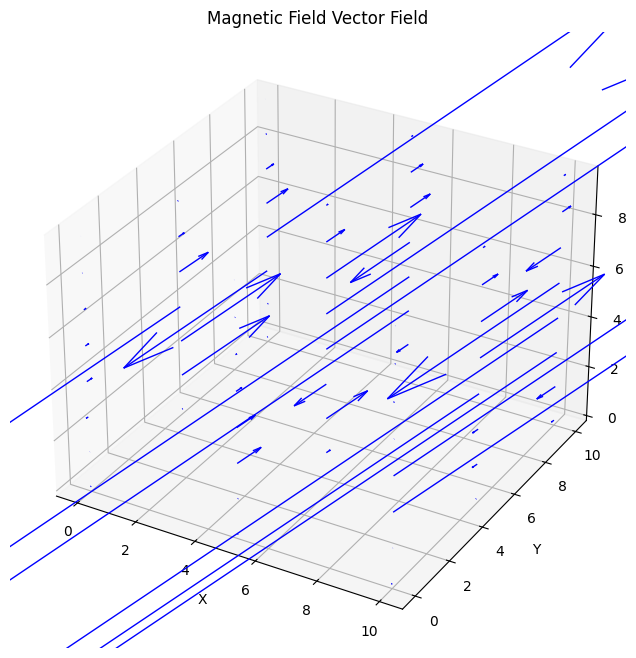

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_magnetic_field(field_map, x_coords, y_coords, z_coords):
    """
    Plots a 3D quiver plot of the magnetic field map.

    :param field_map: A 4D NumPy array of shape (nx, ny, nz, 3) where the 4th dimension
                      contains the magnetic field vector [Bx, By, Bz].
    :param x_coords: 1D array of x coordinates.
    :param y_coords: 1D array of y coordinates.
    :param z_coords: 1D array of z coordinates.
    """

    # Create a meshgrid of x, y, z points
    X, Y, Z = np.meshgrid(x_coords, y_coords, z_coords, indexing='ij')

    # Extract the Bx, By, Bz components from the field map
    Bx = field_map[..., 0]
    By = field_map[..., 1]
    Bz = field_map[..., 2]

    # Create a 3D figure
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Quiver plot (downsampled for clarity, adjust step size as needed)
    step = 20  # Adjust this to reduce the number of arrows for clarity
    ax.quiver(X[::step, ::step, ::step], Y[::step, ::step, ::step], Z[::step, ::step, ::step],
              Bx[::step, ::step, ::step], By[::step, ::step, ::step], Bz[::step, ::step, ::step],
              length=0.01, normalize=False, color='b', linewidth=1)

    # Set plot labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Magnetic Field Vector Field')

    plt.show()

# Example usage
if __name__ == "__main__":
    # Define the magnetic field map (example data)
    x_coords = np.linspace(0, 10, 41)
    y_coords = np.linspace(0, 10, 41)
    z_coords = np.linspace(0, 10, 146)

    # Example field map: Random values for Bx, By, Bz (replace with actual data)
    field_map = B

    # Plot the magnetic field
    plot_magnetic_field(field_map, x_coords, y_coords, z_coords)


In [ ]:
B = np.zeros((41,41,146,3))
for r in field:

    B[int(r[0]),int(r[1]),int(r[2])] = r[3:]

[0. 0. 0.]


In [ ]:
# Function to find indices of rows with incorrect number of elements
def find_invalid_rows(file_path):
    invalid_rows = []

    # Read the file line by line
    with open(file_path, 'r') as file:
        lines = file.readlines()

        # Check each line
        for i, line in enumerate(lines):
            # Split the line by spaces
            elements = line.split()

            # If the number of elements is not 6, record the row index (i+1 for human-readable index)
            if len(elements) != 6:
                invalid_rows.append(i + 1)

    return invalid_rows

# Path to the file
file_path = 'Data/Bfield.rtf'  # Update with your file path

# Find and print invalid row indices
invalid_row_indices = find_invalid_rows(file_path)
if invalid_row_indices:
    print(f"Rows with incorrect number of elements: {invalid_row_indices}")
else:
    print("All rows have the correct number of elements.")


All rows have the correct number of elements.


/Users/georgescriven/Documents/GitHub/TrackExtrapolation/magnetic_field.py:11: RuntimeWarning: overflow encountered in scalar power
  Bx = self.B0 * -4*z**2 - 4* z  # Parabolic in Z
/Users/georgescriven/Documents/GitHub/TrackExtrapolation/magnetic_field.py:12: RuntimeWarning: overflow encountered in scalar power
  By = self.B0 * -4*z**2 - 4* z  # Parabolic in Z
/Users/georgescriven/anaconda3/envs/Q_env/lib/python3.10/site-packages/numpy/_core/numeric.py:1710: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b2, out=cp0)
/Users/georgescriven/anaconda3/envs/Q_env/lib/python3.10/site-packages/numpy/_core/numeric.py:1714: RuntimeWarning: invalid value encountered in multiply
  multiply(a0, b2, out=tmp)
/Users/georgescriven/Documents/GitHub/TrackExtrapolation/magnetic_field.py:11: RuntimeWarning: invalid value encountered in scalar subtract
  Bx = self.B0 * -4*z**2 - 4* z  # Parabolic in Z
/Users/georgescriven/Documents/GitHub/TrackExtrapolation/magnetic_field.py:12: Run

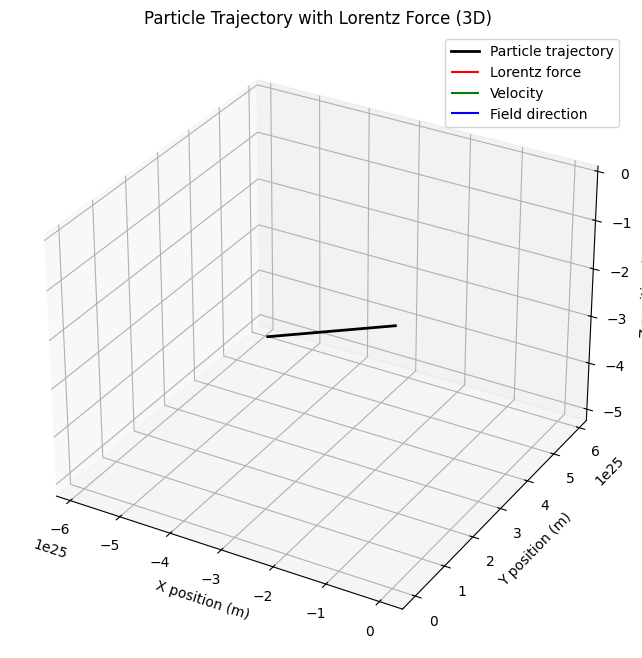

In [ ]:
# main_script.py

from magnetic_field import Quadratic_Field
from particle import Particle
from Simulators import RK4_sim

def RK4_simulate_particles():
    B0 = 10         # Base magnetic field strength (Tesla)
    dt = 1e-1     # Time step (seconds)
    num_steps = 1000  # Number of steps in the simulation

    # Create a magnetic field
    magnetic_field = Quadratic_Field(B0)

    # Create a particle (charge, mass, initial position, initial velocity in the z-direction)
    electron = Particle(charge=-1.6e-19, mass=9.11e-31, position=[0, 0, 0], velocity=[0, 0, 1e6])

    # Create a simulation for the particle
    electron_simulation = RK4_sim(electron, magnetic_field, dt, num_steps)

    # Run simulation
    electron_simulation.run()

    # Plot the trajectory with the magnetic field
    electron_simulation.plot_trajectory_with_lorentz_force()

# Run the simulation
RK4_simulate_particles()

In [7]:
from Classes.magnetic_field import Quadratic_Field, LHCb_Field
from Classes.particle import Particle, particle_state
from Classes.Simulators import RK4_sim_dt, RK4_sim_dz

import numpy as np

data = 'Data/Bfield_recentred.rtf'
dt = 1e-1     # Time step (seconds)
num_steps = 14000  # Number of steps in the simulation

# Natural units: c = 1, ħ = 1
# Charge of electron in natural units (e = 1)
e_charge = -1.0
# Mass of electron in natural units (me = 511 keV/c^2)
e_mass = 511e3  # in eV

# Charge and mass of proton in natural units
p_charge = 1.0
p_mass = 938.272e6  # in eV

# Charge and mass of neutron in natural units
n_charge = 0.0
n_mass = 939.565e6  # in eV

# Mass of pion in natural units
pi_mass = 139.57018e6  # in eV

# Mass of muon in natural units
mu_mass = 105.6583745e6  # in eV

# field = LHCb_Field('Data/Bfield.rtf')
Qfield = Quadratic_Field(1e-3)
LHCbField = LHCb_Field(data)

In [18]:
class particle_state:

    def __init__(self, Ptype, position, tx, ty, momentum, charge):
        self.Ptype = Ptype
        self.state = {'x' : position[0], 'y' : position[1], 'tx' : tx, 'ty' : ty, 'q/p' : charge/np.linalg.norm(momentum)}
        self.state_histores = [self.state.copy()]
        self.record_state()

        print(f'init state : {self.state}')
    def update_state(self, state):
        self.state = state

    def record_state(self):
        self.state_histores.append(self.state.copy())

    def get_state(self):
        return self.state

    def get_state_histores(self):
        return self.state_histores

In [19]:
particle_state_electron = [particle_state(Ptype='Electron', position=[20, 20], tx=0, ty=0, momentum=[0, 0, 0.75 * e_mass], charge=e_charge)]

init state : {'x': 20, 'y': 20, 'tx': 0, 'ty': 0, 'q/p': -2.609262883235486e-06}


In [20]:
np.abs([1,-1,1])

array([1, 1, 1])

In [17]:
np.linalg.norm([1,-1,1])

1.7320508075688772